In [ ]:
!pip install ultralytics
!pip install omegaconf
!pip install opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.8/874.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=c853df6f864be52b627a79f4fe201078fb8efad19e559832fbbe0073cb7a75a7
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gb
import pickle
import cv2
import torch
import urllib
from tqdm import tqdm
from ultralytics import YOLO
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/imthebaron/face-detection-models')

In [ ]:
urllib.request.urlretrieve("https://github.com/akanametov/yolov8-face/releases/download/v0.0.0/yolov8n-face.pt", "yolov8n-face.pt")

('yolov8n-face.pt', <http.client.HTTPMessage at 0x7e4011aefa00>)

In [2]:
yolo_model = YOLO('cascade models/yolov8n-face.pt')

In [3]:
class_names = {0: 'ASHHAB', 1: 'Abir', 2: 'Afif', 3: 'Alvi', 4: 'Apurba', 5: 'Arnob', 6: 'Arshad', 7: 'Ashiq', 8: 'Avizit', 9: 'Dristi', 10: 'Farhan', 11: 'GM ABUBAKAR SIDDIQ', 12: 'Hasib', 13: 'Hasnatur', 14: 'Ishmam', 15: 'Jahin', 16: 'Khushbu', 17: 'Kowshik', 18: 'MAYSHA', 19: 'MRIDUL', 20: 'Maishara', 21: 'Mehrab', 22: 'Nipa Rahman', 23: 'Nishat', 24: 'Prachurjo', 25: 'Pranto', 26: 'Rafsan', 27: 'Ramisa', 28: 'Rassel', 29: 'Ridoy', 30: 'Rizon', 31: 'Rokon', 32: 'Rono', 33: 'SHOHIDUL', 34: 'SHUVO', 35: 'SUN', 36: 'Sadi', 37: 'Saif', 38: 'Sakib', 39: 'Sanim', 40: 'Sayem', 41: 'Shaila', 42: 'Shaivik', 43: 'Shakibul', 44: 'Shatabdi', 45: 'ShuvoSaha', 46: 'Siam', 47: 'Sintheia', 48: 'Sudipta', 49: 'Sumaiya', 50: 'Tahsin', 51: 'Tahsin Kabir', 52: 'Taj', 53: 'Talha', 54: 'Zarin', 55: 'ajmain'}
class_names

{0: 'ASHHAB',
 1: 'Abir',
 2: 'Afif',
 3: 'Alvi',
 4: 'Apurba',
 5: 'Arnob',
 6: 'Arshad',
 7: 'Ashiq',
 8: 'Avizit',
 9: 'Dristi',
 10: 'Farhan',
 11: 'GM ABUBAKAR SIDDIQ',
 12: 'Hasib',
 13: 'Hasnatur',
 14: 'Ishmam',
 15: 'Jahin',
 16: 'Khushbu',
 17: 'Kowshik',
 18: 'MAYSHA',
 19: 'MRIDUL',
 20: 'Maishara',
 21: 'Mehrab',
 22: 'Nipa Rahman',
 23: 'Nishat',
 24: 'Prachurjo',
 25: 'Pranto',
 26: 'Rafsan',
 27: 'Ramisa',
 28: 'Rassel',
 29: 'Ridoy',
 30: 'Rizon',
 31: 'Rokon',
 32: 'Rono',
 33: 'SHOHIDUL',
 34: 'SHUVO',
 35: 'SUN',
 36: 'Sadi',
 37: 'Saif',
 38: 'Sakib',
 39: 'Sanim',
 40: 'Sayem',
 41: 'Shaila',
 42: 'Shaivik',
 43: 'Shakibul',
 44: 'Shatabdi',
 45: 'ShuvoSaha',
 46: 'Siam',
 47: 'Sintheia',
 48: 'Sudipta',
 49: 'Sumaiya',
 50: 'Tahsin',
 51: 'Tahsin Kabir',
 52: 'Taj',
 53: 'Talha',
 54: 'Zarin',
 55: 'ajmain'}

In [5]:
model = tf.keras.models.load_model('saved models/face densenet121.h5')
model.summary()

Model: "bengali.ai"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 56)             │        28,728 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,644,730 (32.98 MB)

 Trainable params: 8,559,032 (32.65 MB)

 Non-trainable params: 85,696 (334.75 KB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


[32]
 Predicted label is:Rono


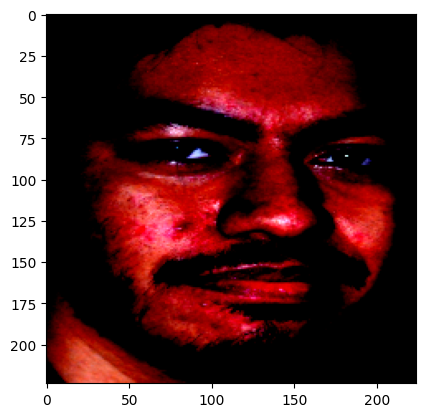

In [7]:
import numpy as np

img = tf.keras.utils.load_img('datasets/yolo_faces/Rono/2.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img = tf.keras.applications.densenet.preprocess_input(img_array)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)
print([np.argmax(np.round(img_predictions,2))])
pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

plt.imshow(img)

In [15]:
# face detection with yolov8 and pred
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("no webcam.")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("no frame")
        break

    results = yolo_model(frame)
    for result in results:
            if len(results[0].boxes) > 0:
                box = results[0].boxes[0].xyxy[0].cpu().numpy().astype(int)
                x_min, y_min, x_max, y_max = box

                face_only = frame[y_min:y_max, x_min:x_max]

                img = cv2.resize(face_only, (224, 224))
                img = tf.keras.applications.densenet.preprocess_input(img) #IF USING face densenet121 model
                #img = tf.keras.applications.xception.preprocess_input(img) #If using custom.h5 model
                img_array = tf.expand_dims(img, 0)

                img_predictions = model.predict(img_array)

                pred_index = np.argmax(np.round(img_predictions,2))

                pred_label = class_names[pred_index]

                conf_rate = np.max(img_predictions)
                text = str(f"{pred_label} {conf_rate*100:.2f}%")

            boxes = result.boxes
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow('Face Detection with pred', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 1 face, 1773.3ms
Speed: 28.9ms preprocess, 1773.3ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step

0: 480x640 (no detections), 421.4ms
Speed: 20.9ms preprocess, 421.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 352.6ms
Speed: 7.0ms preprocess, 352.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 326.8ms
Speed: 7.0ms preprocess, 326.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step

0: 480x640 1 face, 376.0ms
Speed: 5.7ms preprocess, 376.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step

0: 480x640 1 face, 337.4ms
Speed: 7.1ms preprocess, 337.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step

0: 480x640 1 face, 382.4ms
Speed: 7.0ms preprocess, 382.4ms infer